In [2]:
# Importing Liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading CSV file
df = pd.read_csv('Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8399 non-null   int64  
 1   Ord_id                8399 non-null   object 
 2   Prod_id               8399 non-null   object 
 3   Ship_id               8399 non-null   object 
 4   Cust_id               8399 non-null   object 
 5   Sales                 8399 non-null   float64
 6   Discount              8395 non-null   float64
 7   Order_Quantity        8399 non-null   int64  
 8   Profit                8399 non-null   float64
 9   Shipping_Cost         8399 non-null   float64
 10  Product_Base_Margin   8336 non-null   float64
 11  Product_Category      8398 non-null   object 
 12  Product_Sub_Category  8399 non-null   object 
 13  Customer_Name         8399 non-null   object 
 14  Province              8399 non-null   object 
 15  Region               

In [4]:
# Handle missing values and Drop redundant columns

df = df.drop(columns=['Unnamed: 0', 'Ord_id', 'Ord_id_new', 'Cust_id', 'Cust_id_new'])
df['Discount'] = df['Discount'].fillna(df['Discount'].median())
df['Product_Base_Margin'] = df['Product_Base_Margin'].fillna(df['Product_Base_Margin'].median())
df.dropna(subset=['Product_Category', 'Region', 'Customer_Segment'], inplace=True)

In [5]:
# Convert Ship_Date to datetime

df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce', dayfirst=True)

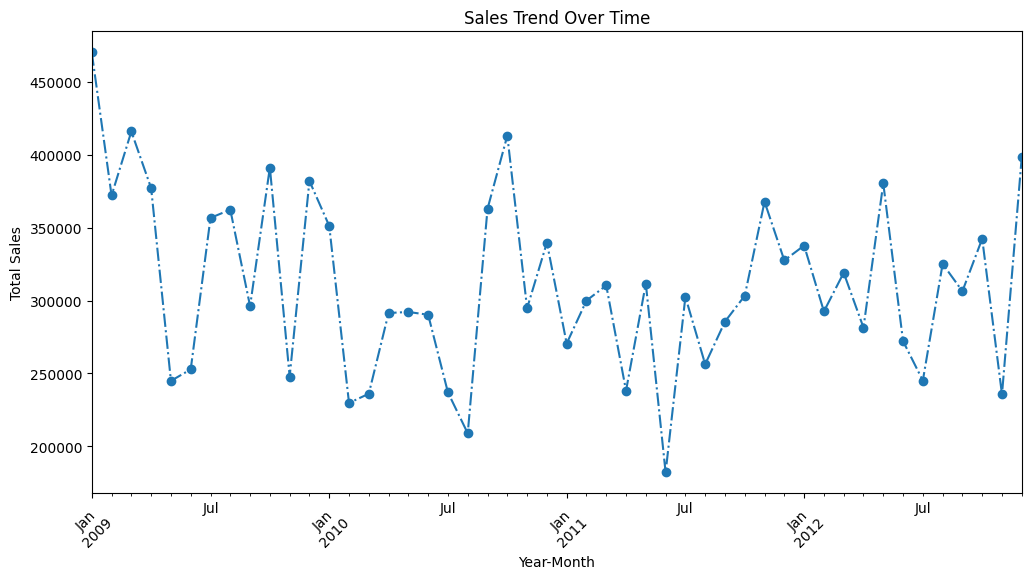

In [20]:
# Sales Trend Over Time

plt.figure(figsize=(12, 6))
df['YearMonth'] = df['Ship_Date'].dt.to_period('M')
sales_trend = df.groupby('YearMonth')['Sales'].sum()
sales_trend.plot(kind='line',linestyle='-.', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

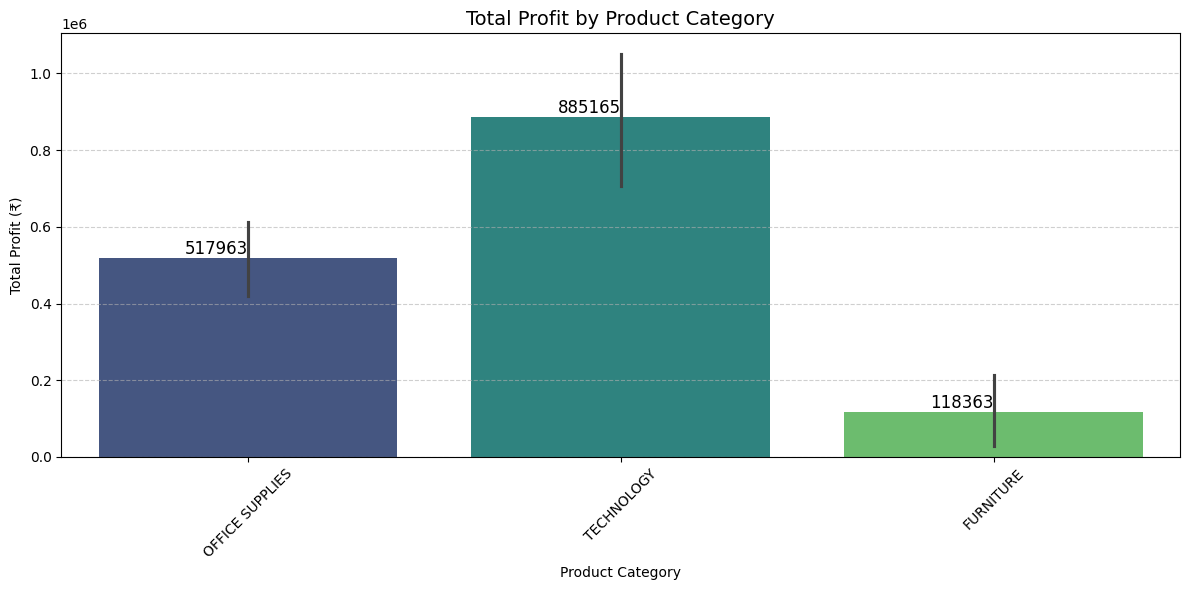

In [7]:
# Profitability by Product Category

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df,
    x='Product_Category',
    hue='Product_Category',
    y='Profit',
    estimator=np.sum,
    palette='viridis'
)

plt.xticks(rotation=45)

# Add data labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',
                (p.get_x() + p.get_width()/2, height),
                va = 'bottom', ha = 'right',
                fontsize=12)

plt.title('Total Profit by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Total Profit (₹)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


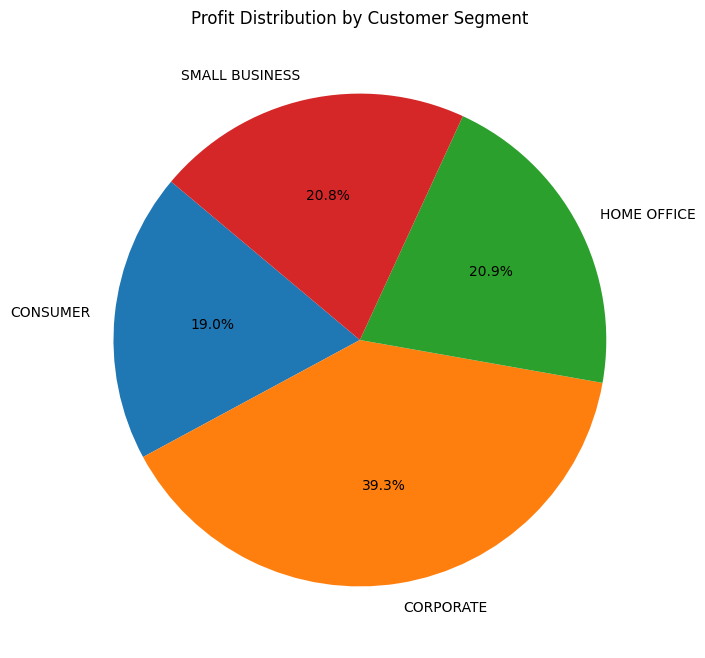

In [24]:
# Most Profitable Customer Segment

segment_profit = df.groupby('Customer_Segment')['Profit'].sum()
plt.figure(figsize=(8, 8))
plt.pie(segment_profit, labels=segment_profit.index, autopct='%1.1f%%', startangle=140)
plt.title('Profit Distribution by Customer Segment')
plt.show()


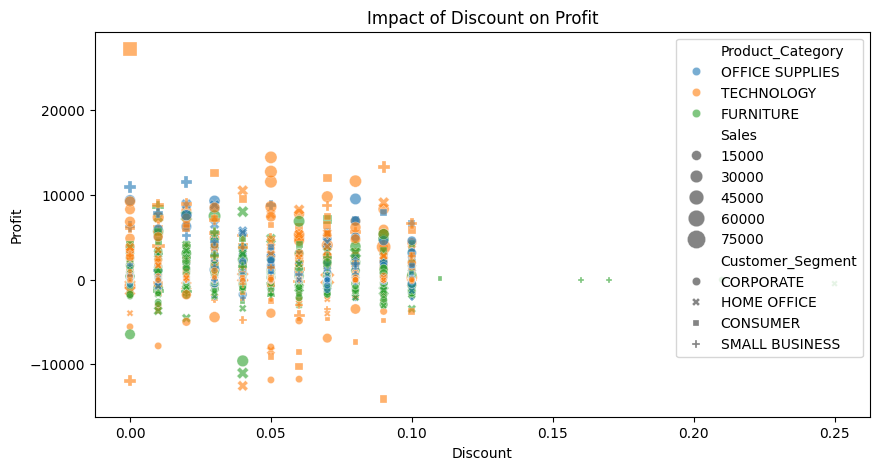

In [9]:
# Impact of Discount on Profit

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,
    x='Discount', y='Profit',
    hue='Product_Category',
    style='Customer_Segment',  # adds different markers
    size='Sales',              # makes points bigger for higher sales
    sizes=(20, 200),           # size range of bubbles
    alpha=0.6
)
plt.title('Impact of Discount on Profit')
plt.show()

<Axes: xlabel='Shipping_Cost', ylabel='Profit'>

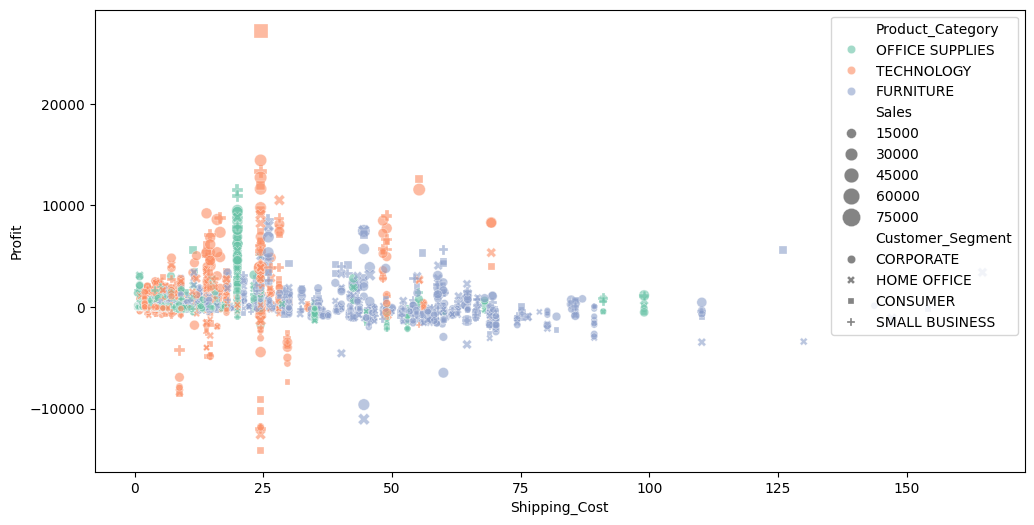

In [21]:
# Shipping Cost vs. Profit

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Shipping_Cost',
    y='Profit',
    hue='Product_Category',    # adds color grouping
    style='Customer_Segment',  # adds different markers
    size='Sales',
    sizes=(20, 200),
    alpha=0.6,
    palette='Set2'
)

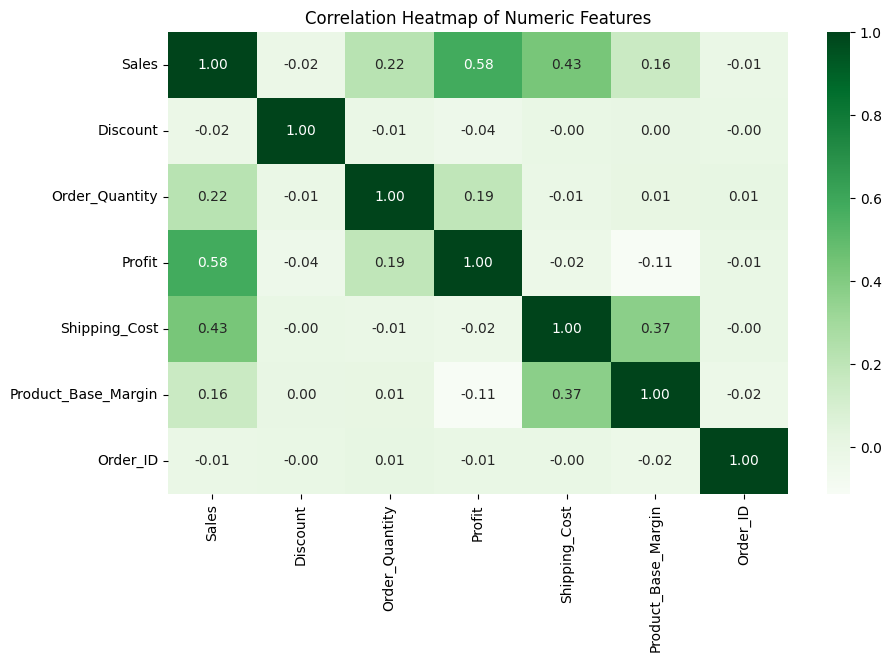

In [13]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])  # keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()